Aquesta és la tasca del Lliurament 2 del mòdul Sistemes d'Aprenentatge Automàtic.

Té cinc preguntes amb quatre apartats cadascuna, totes amb la mateixa puntuació.

#Descens de gradient

Explorau l'efecte de la taxa d'aprenentatge sobre l'algorisme de descens del gradient al simulador que trobareu a https://uclaacm.github.io/gradient-descent-visualiser/#playground

Triau com a funció $10sin(x)$ (haureu d'escriure el coeficient) i com a punt d'inici $x=2$.

Primer, explorau com l'algorisme convergeix a diferents mínims segons quin és el punt inicial que triam.

A continuació, indicau si l'algorisme presenta un comportament **convergent**, **divergent** o **oscil·latori** per als següents valors de la taxa d'aprenentatge.

a) $\alpha = .125$

b) $\alpha = .25$

c) $\alpha = .5$

d) Com es comporta l'algorisme si en lloc de triar una taxa d'aprenentatge positiva la triam negativa?

### **a) Al igualar la tasa de aprendizaje a 0'125 (**𝛼=.125**) el algoritmo converge rápidamente y es aproximadamente a partir de la iteració número 27 que las unidades se mantienen constantes**

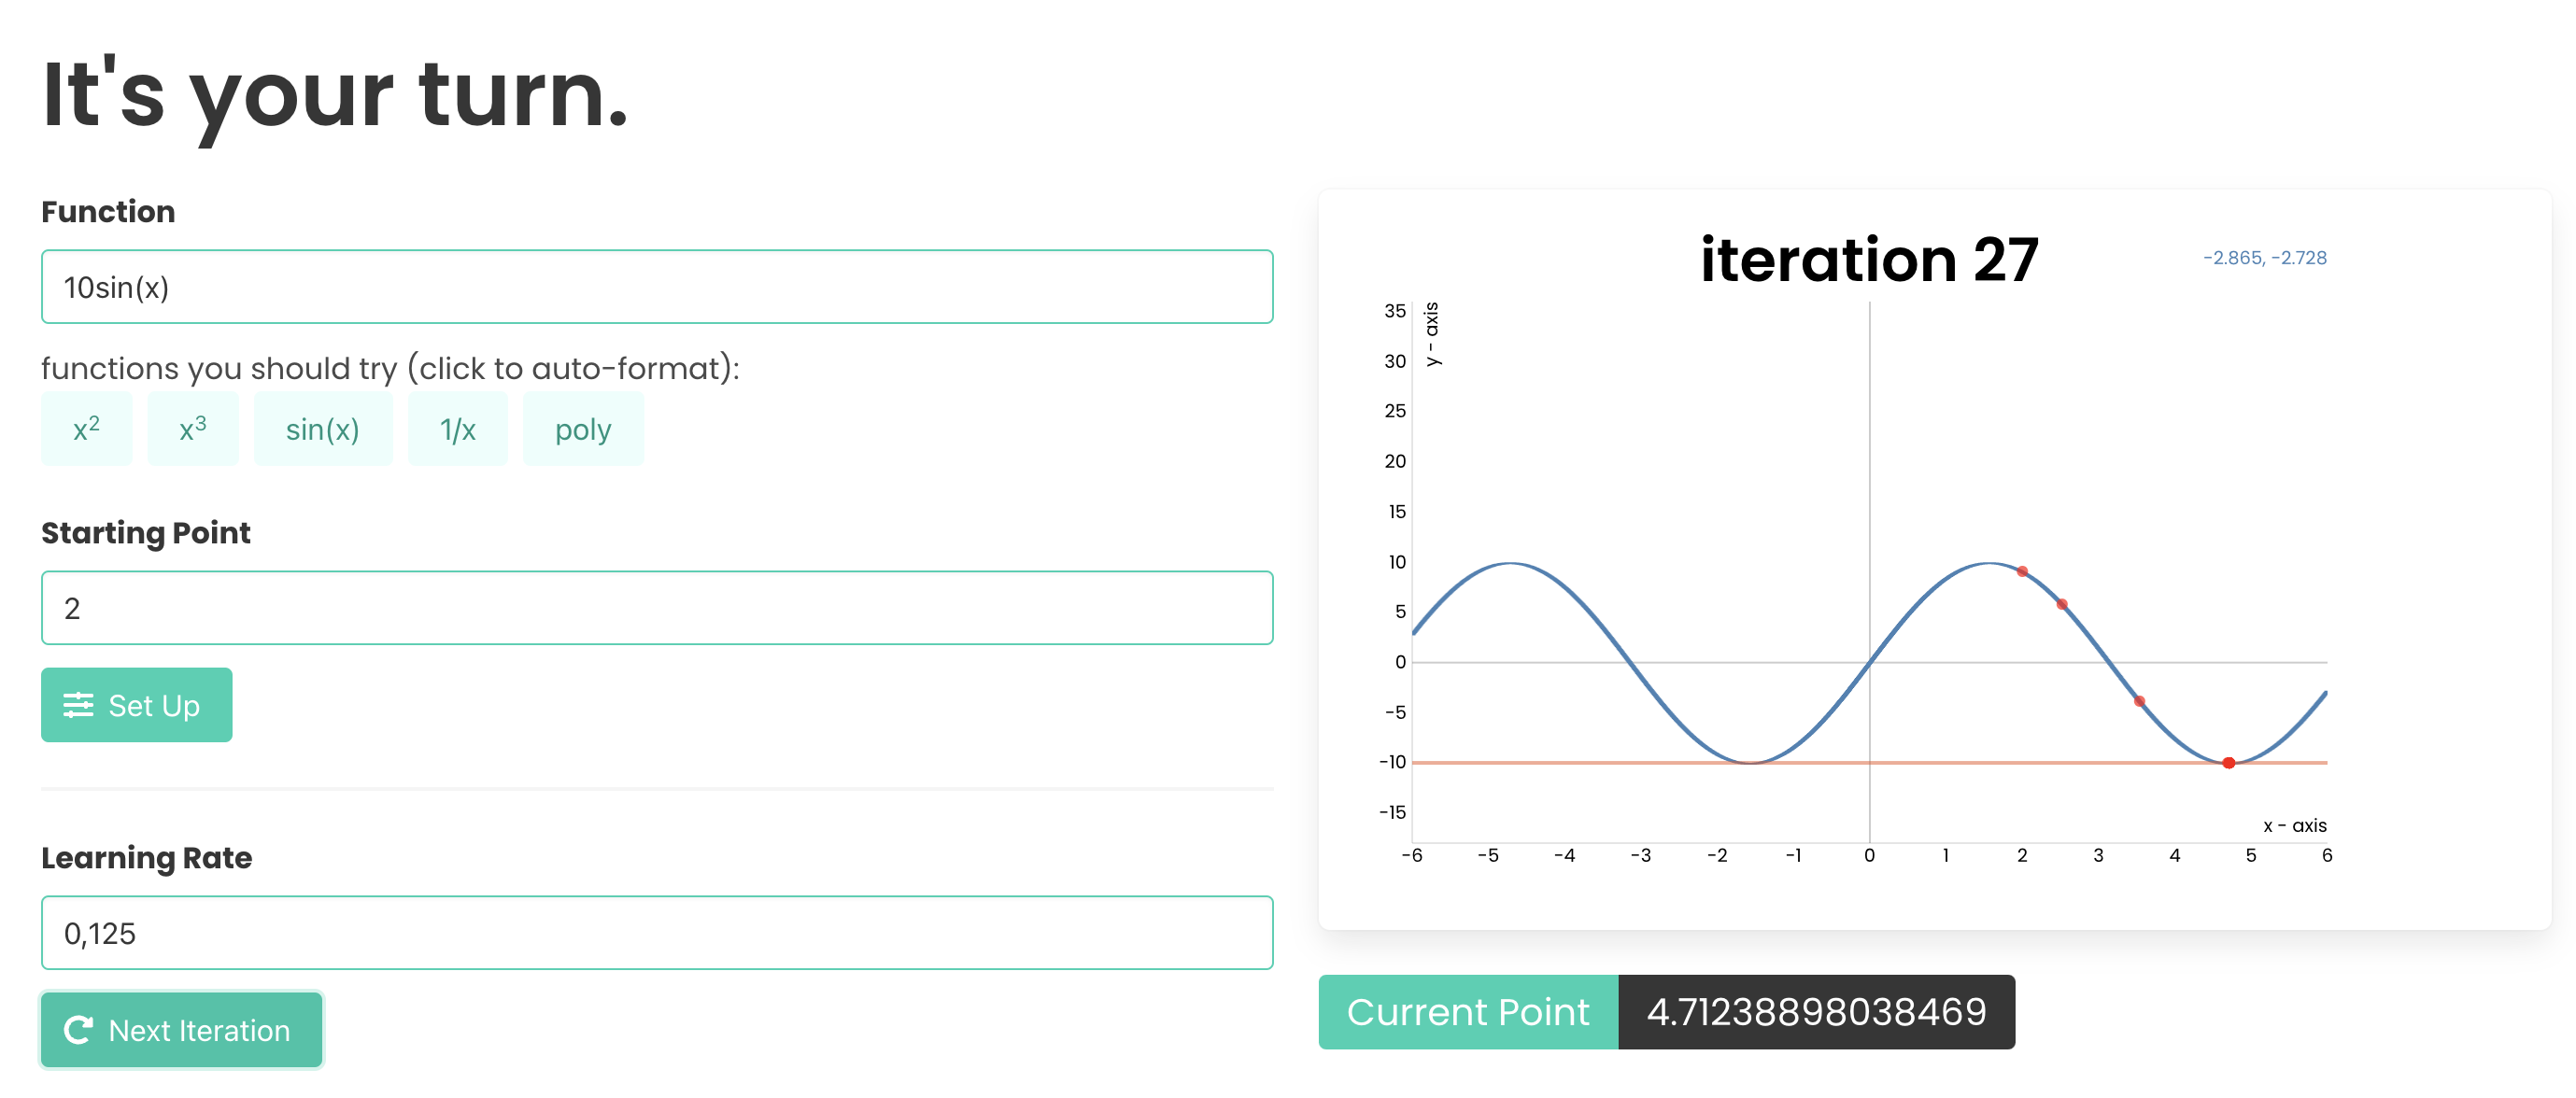

### **b) Al igualar la tasa de aprendizaje a 0'25 (**𝛼=.25**) el algoritmo entra en un modo oscilatorio a partir de la quinta iteración aproximadamente.**

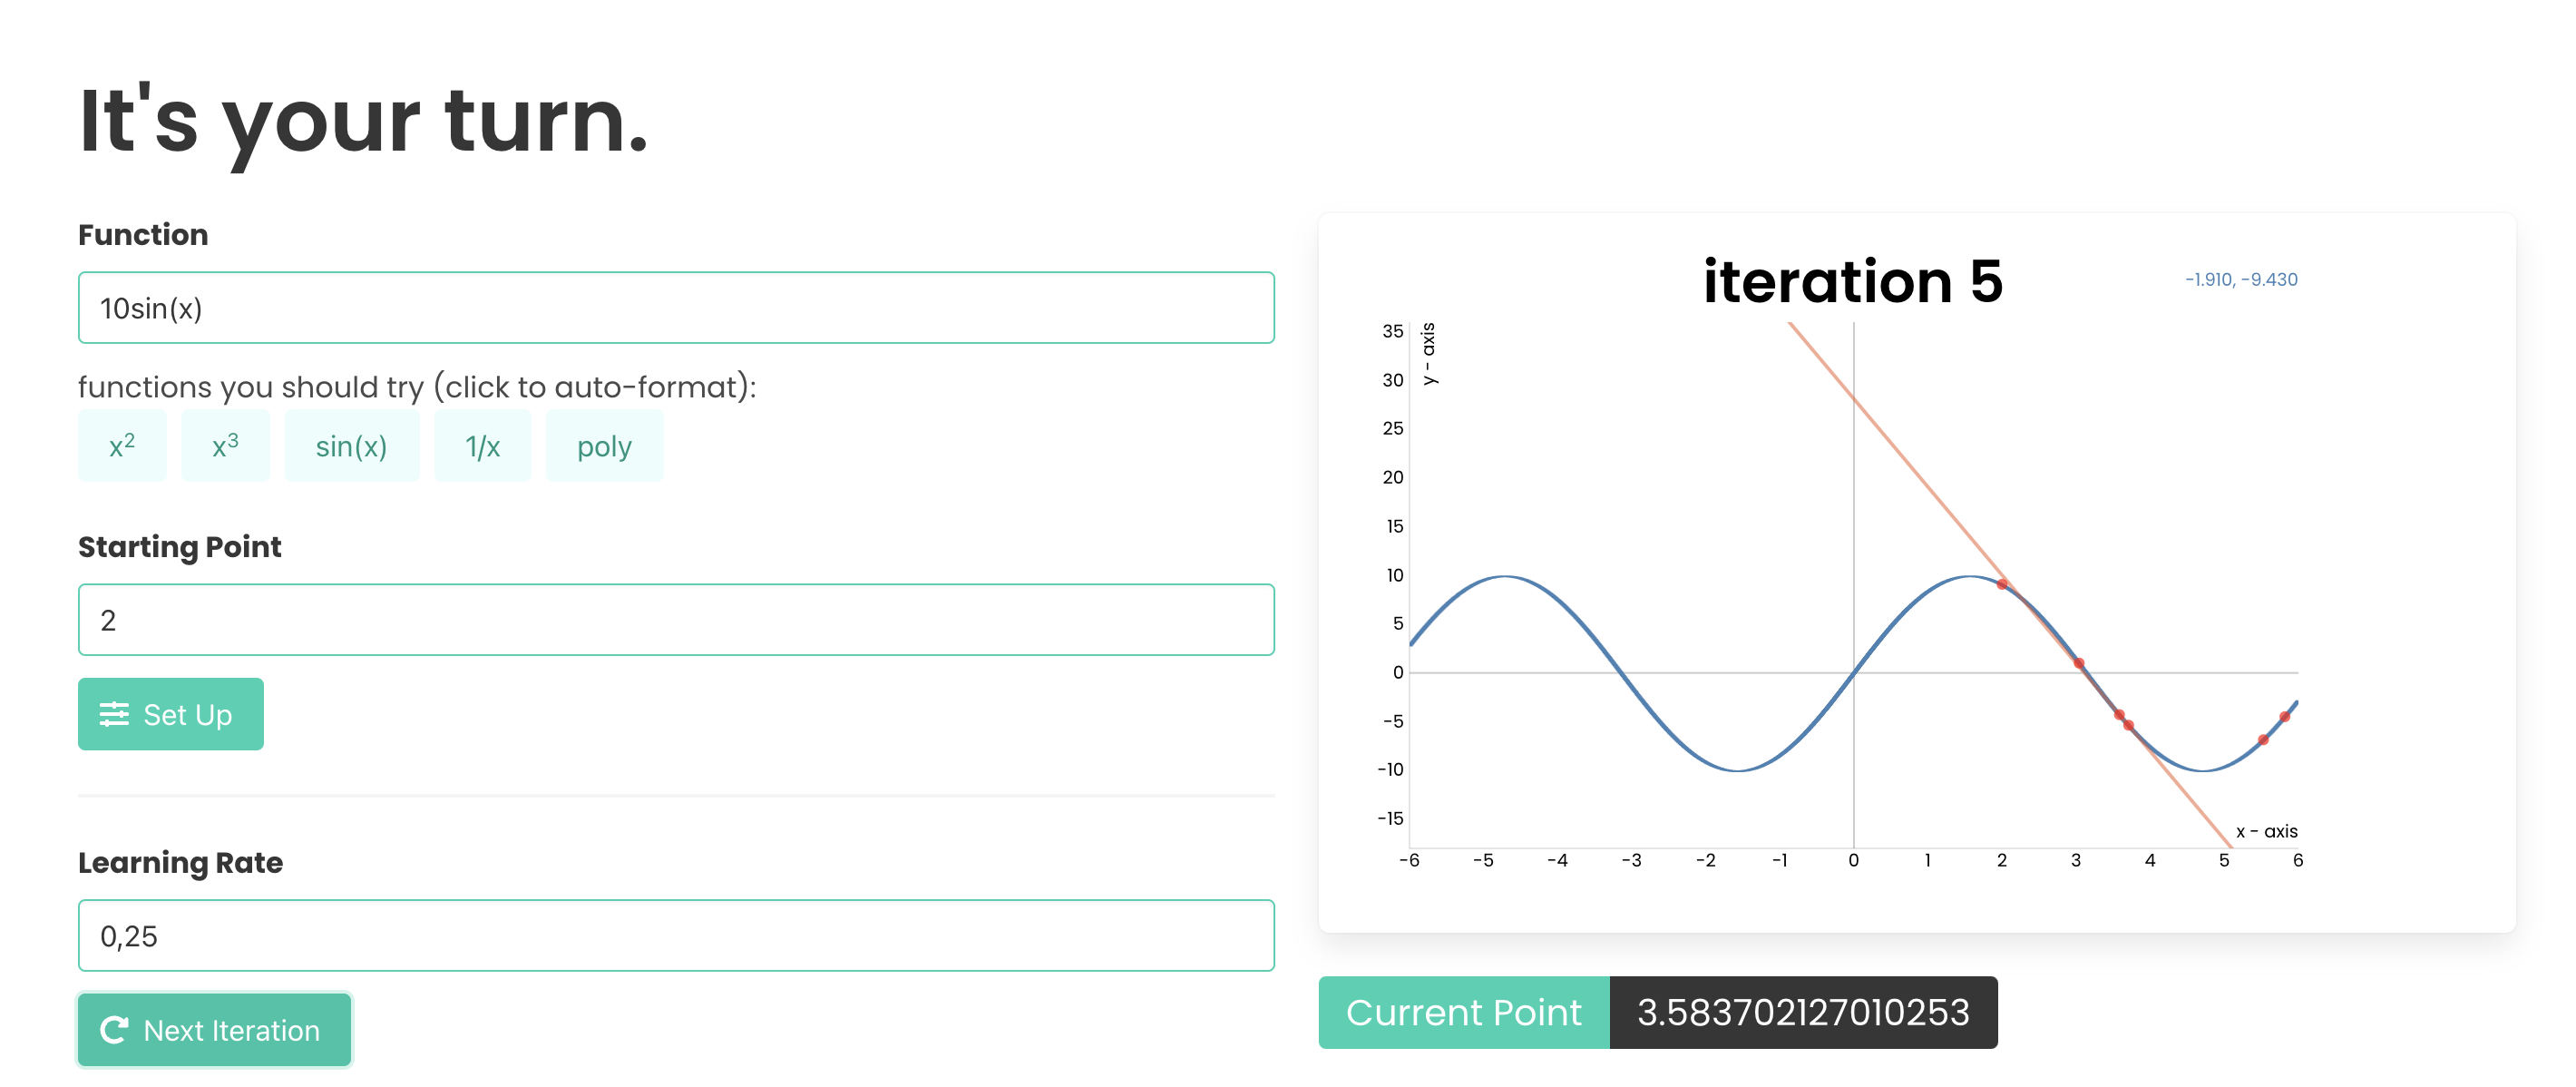

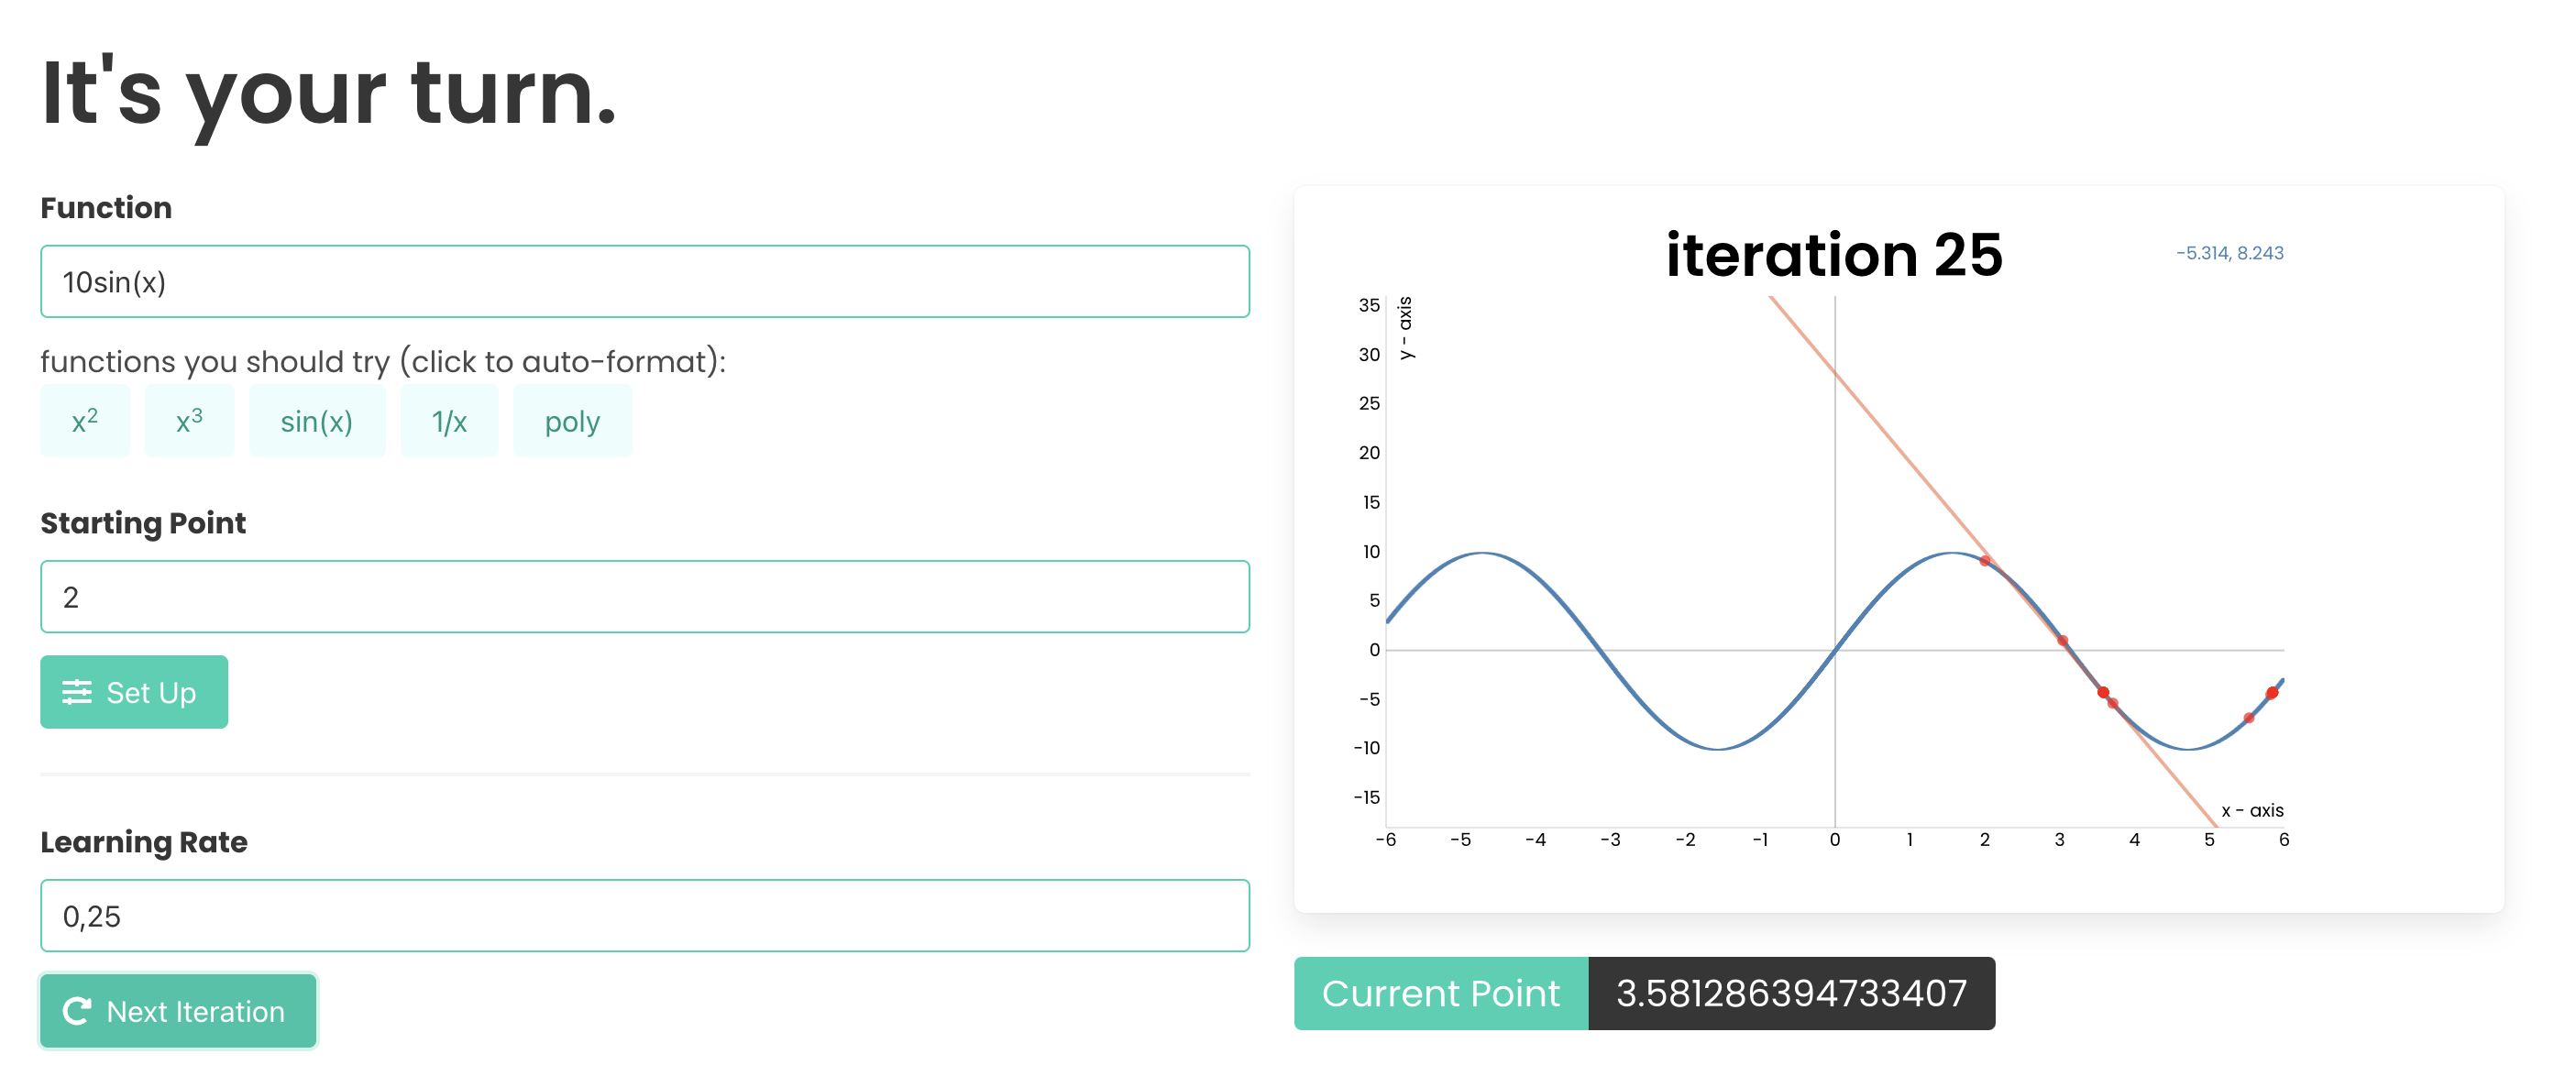

### **c) Al igualar la tasa de aprendizaje a 0'50 (**𝛼=.5**) el algoritmo diverge a partir de la quinta iteración aproximadamente. Y claramente no nos da el resultado óptimo**

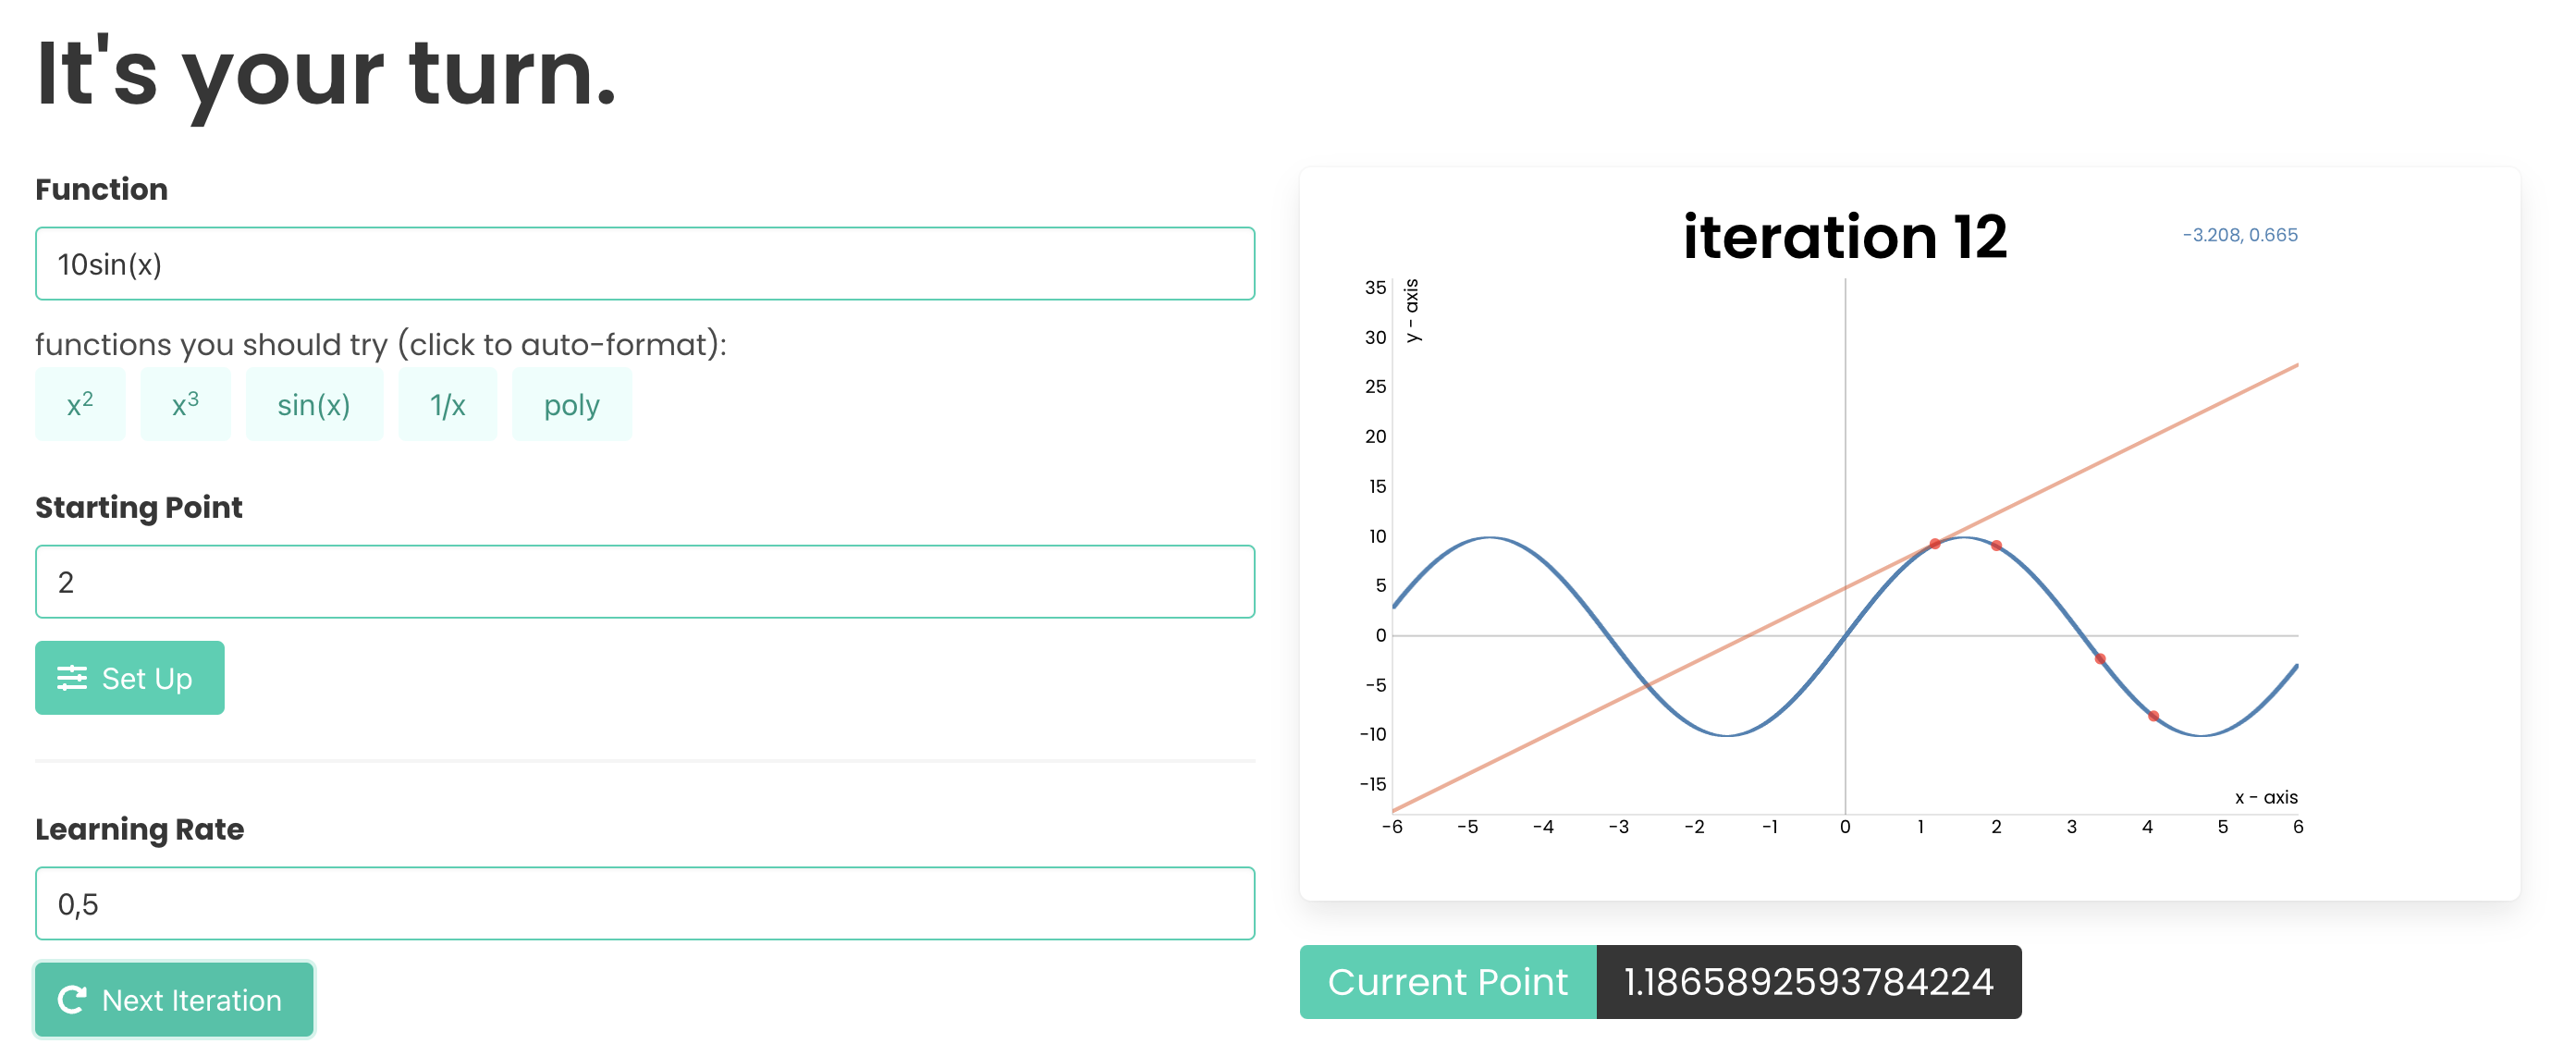

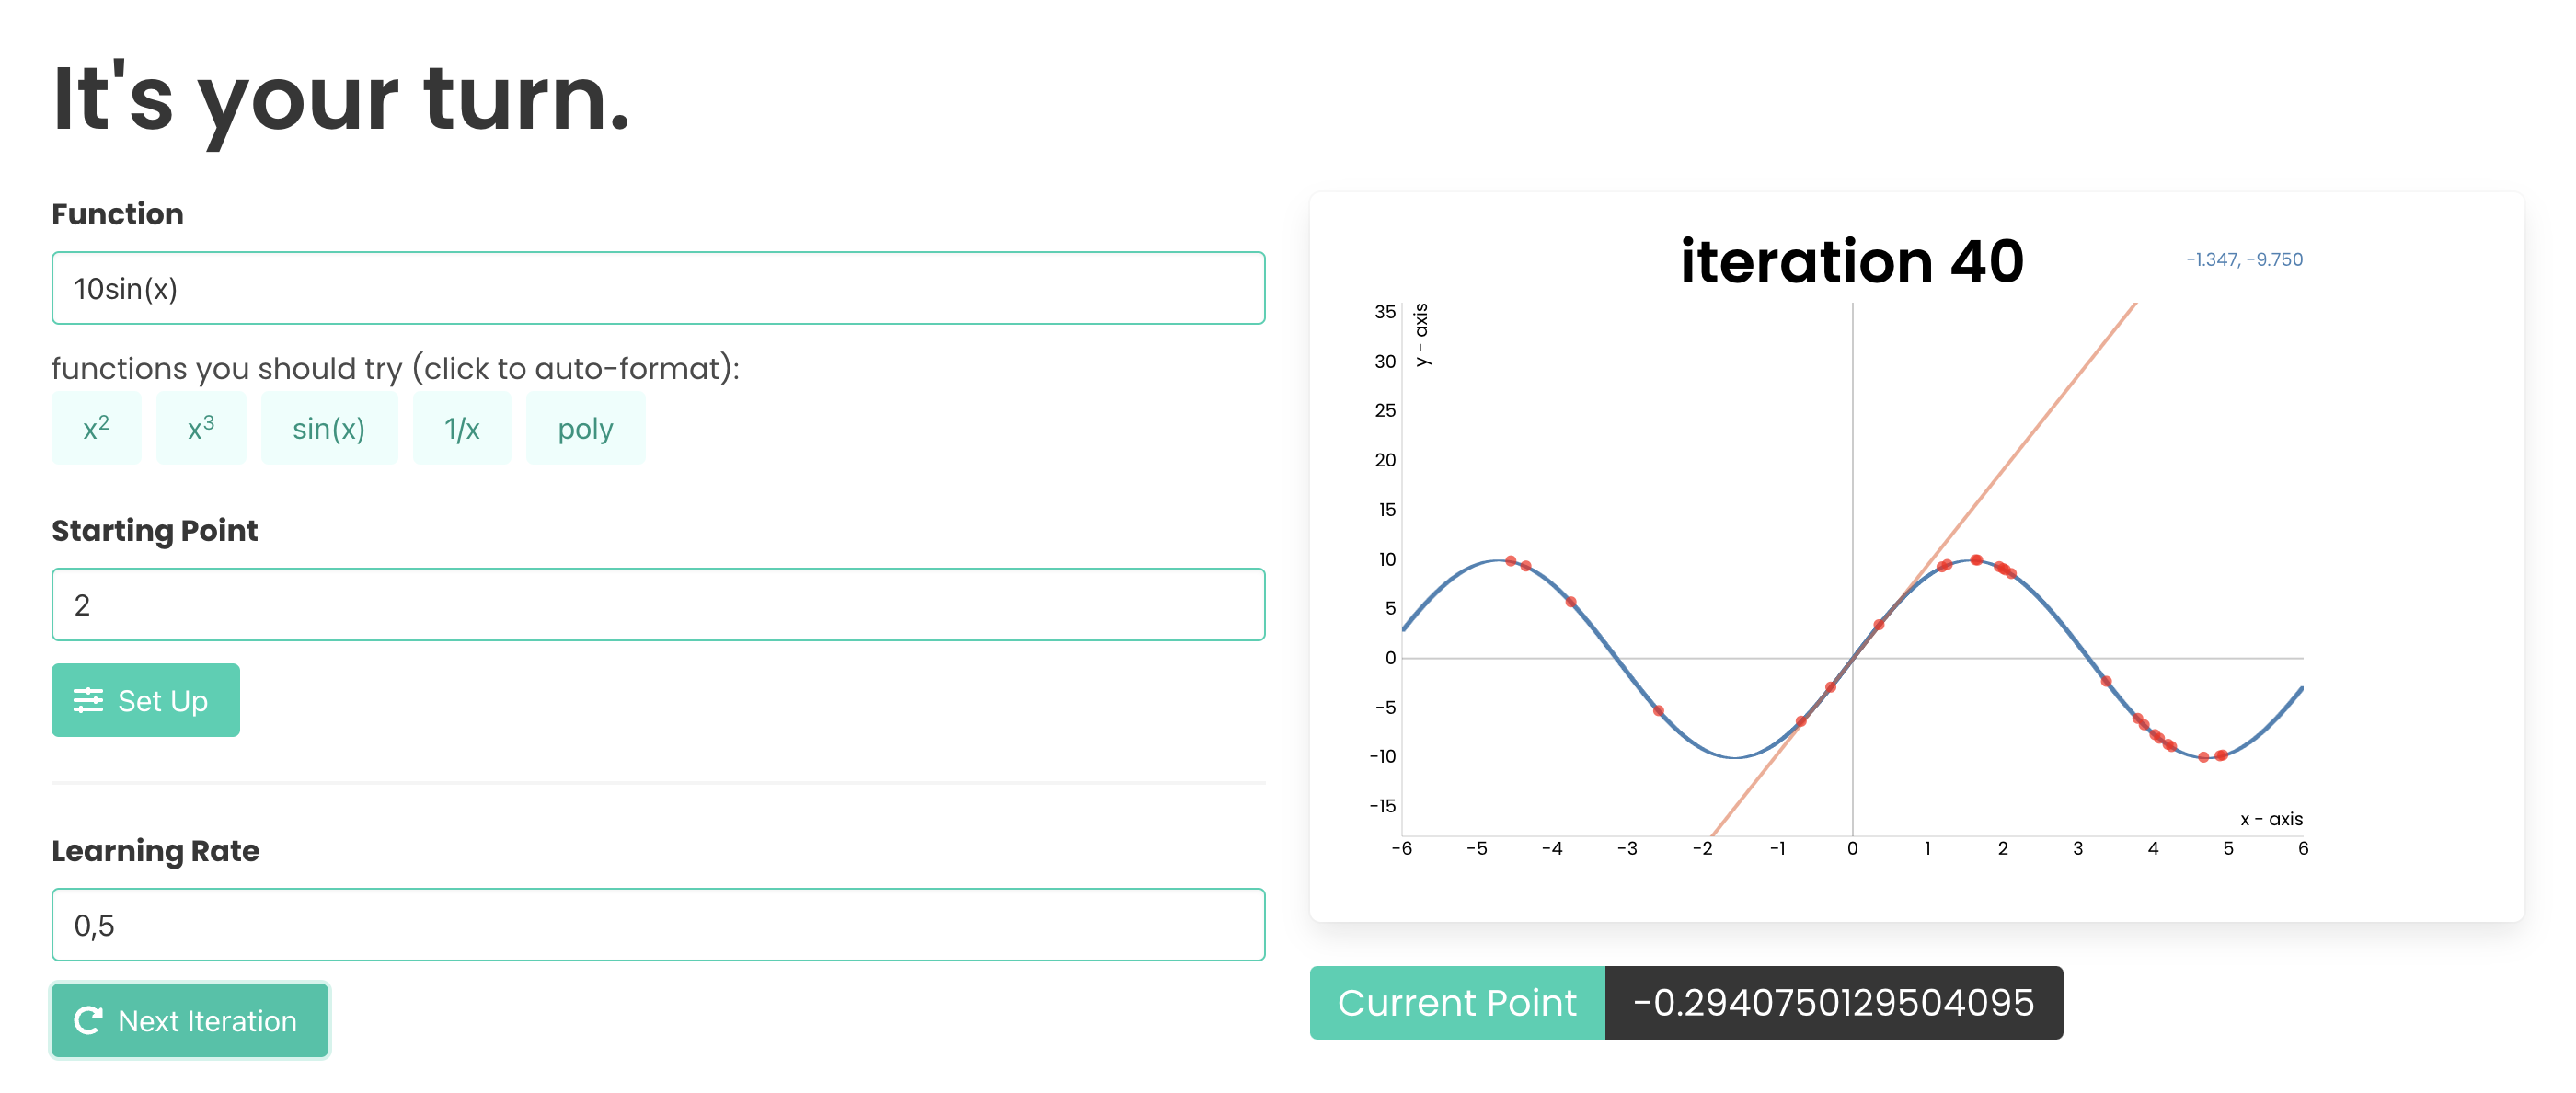

### **d) Por último al usar una tasa de aprendizaje negativa podemos ver que algunos resultados son contrarios a lo que obteniamos anteriormente.**



*   En 𝛼=-0.125 el algoritmo diverge a partir de la tercera o cuarta iteración.
*   En 𝛼=-0.25 el algoritmo pasa a tener un comportamiento oscilatorio.
*   En 𝛼=-0.5 el algoritmo diverge completamente como en el caso anterior

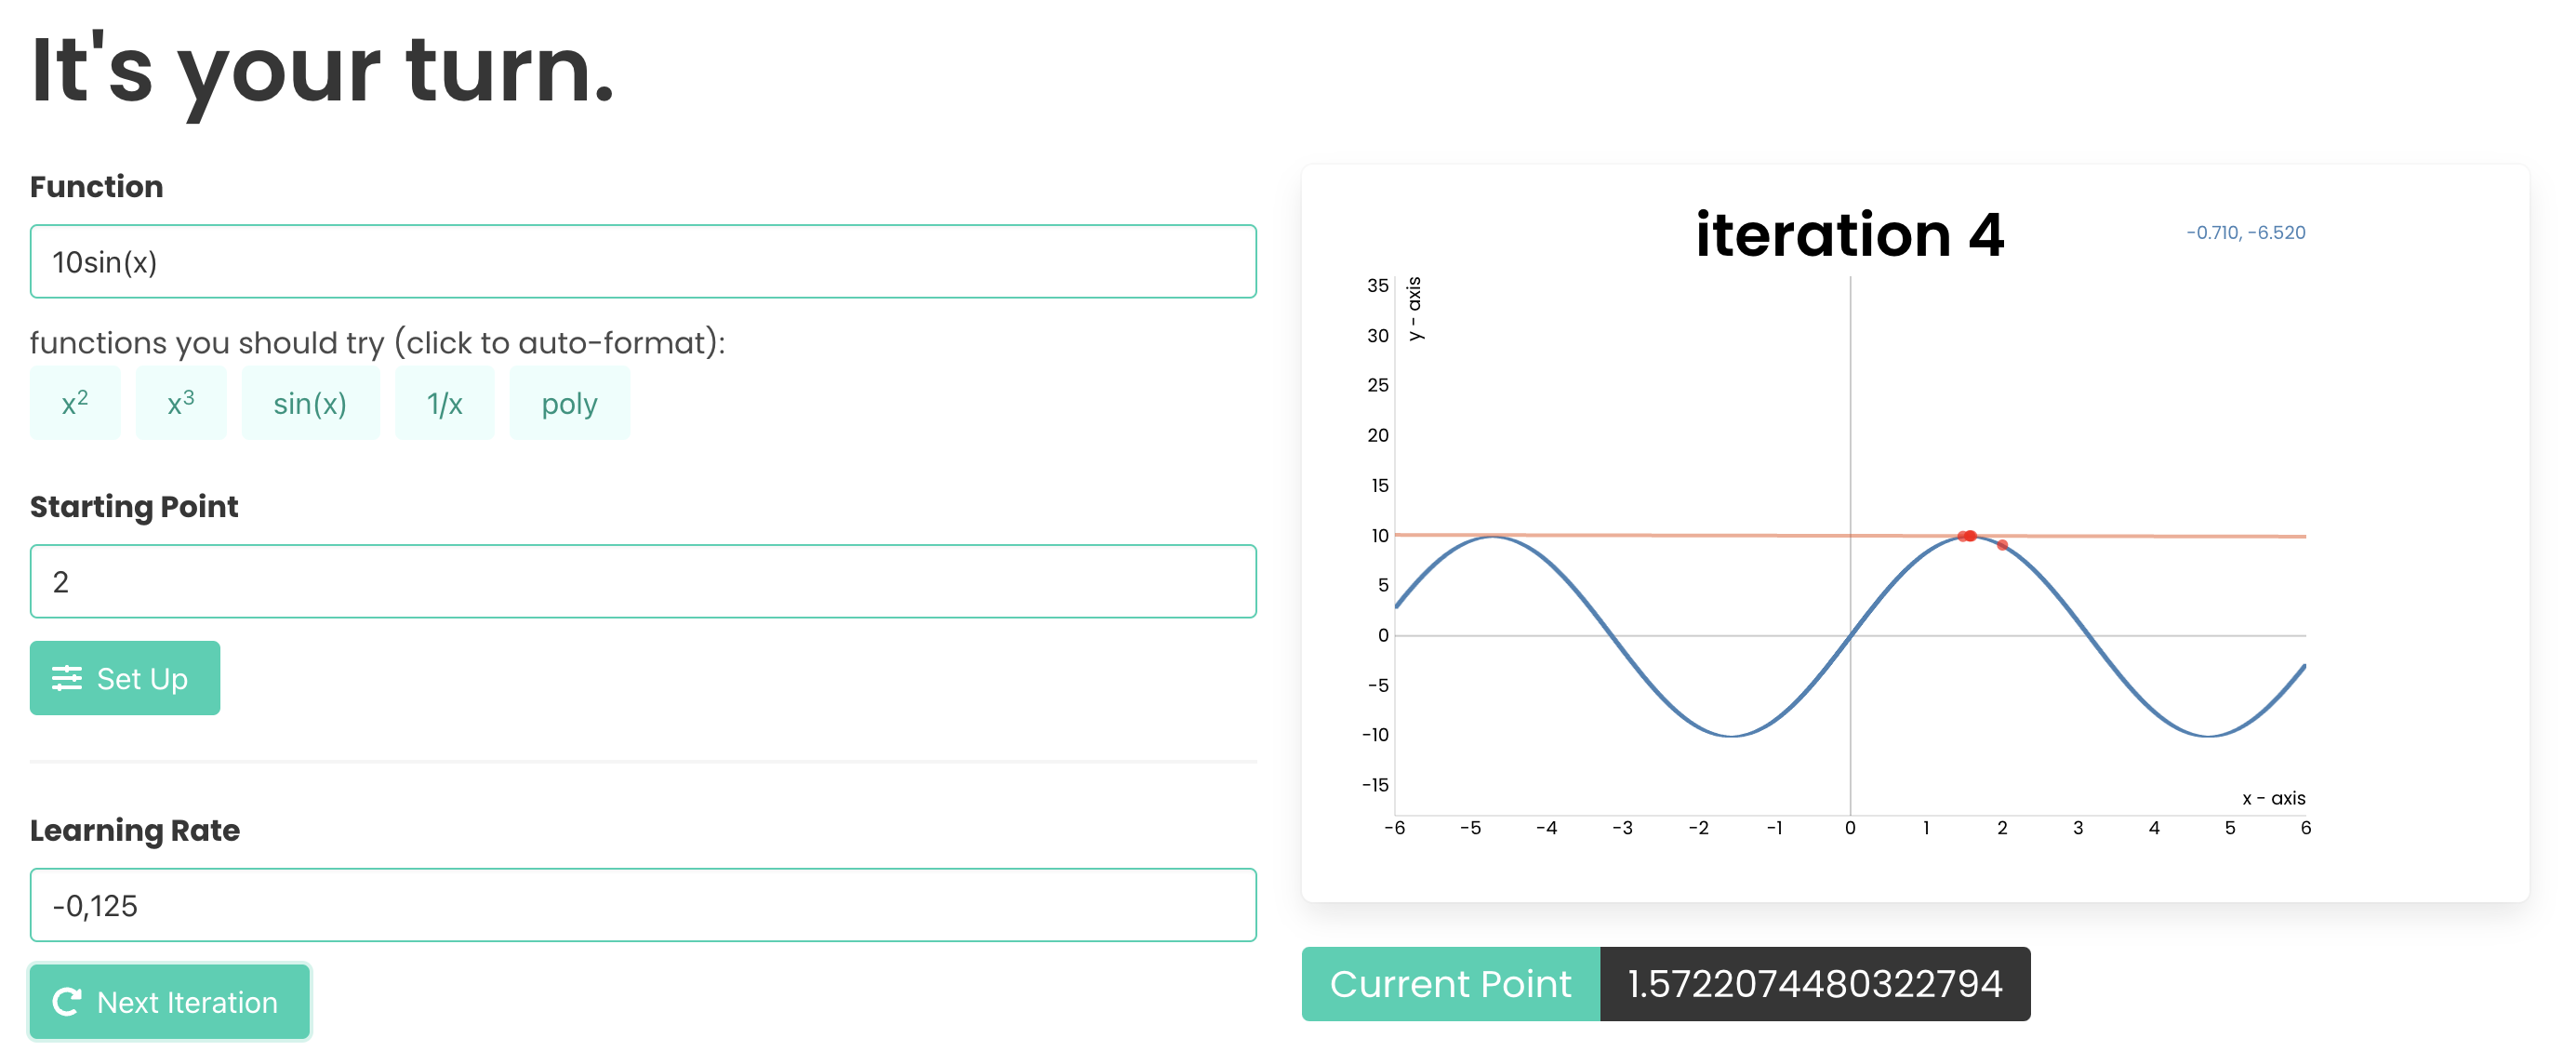

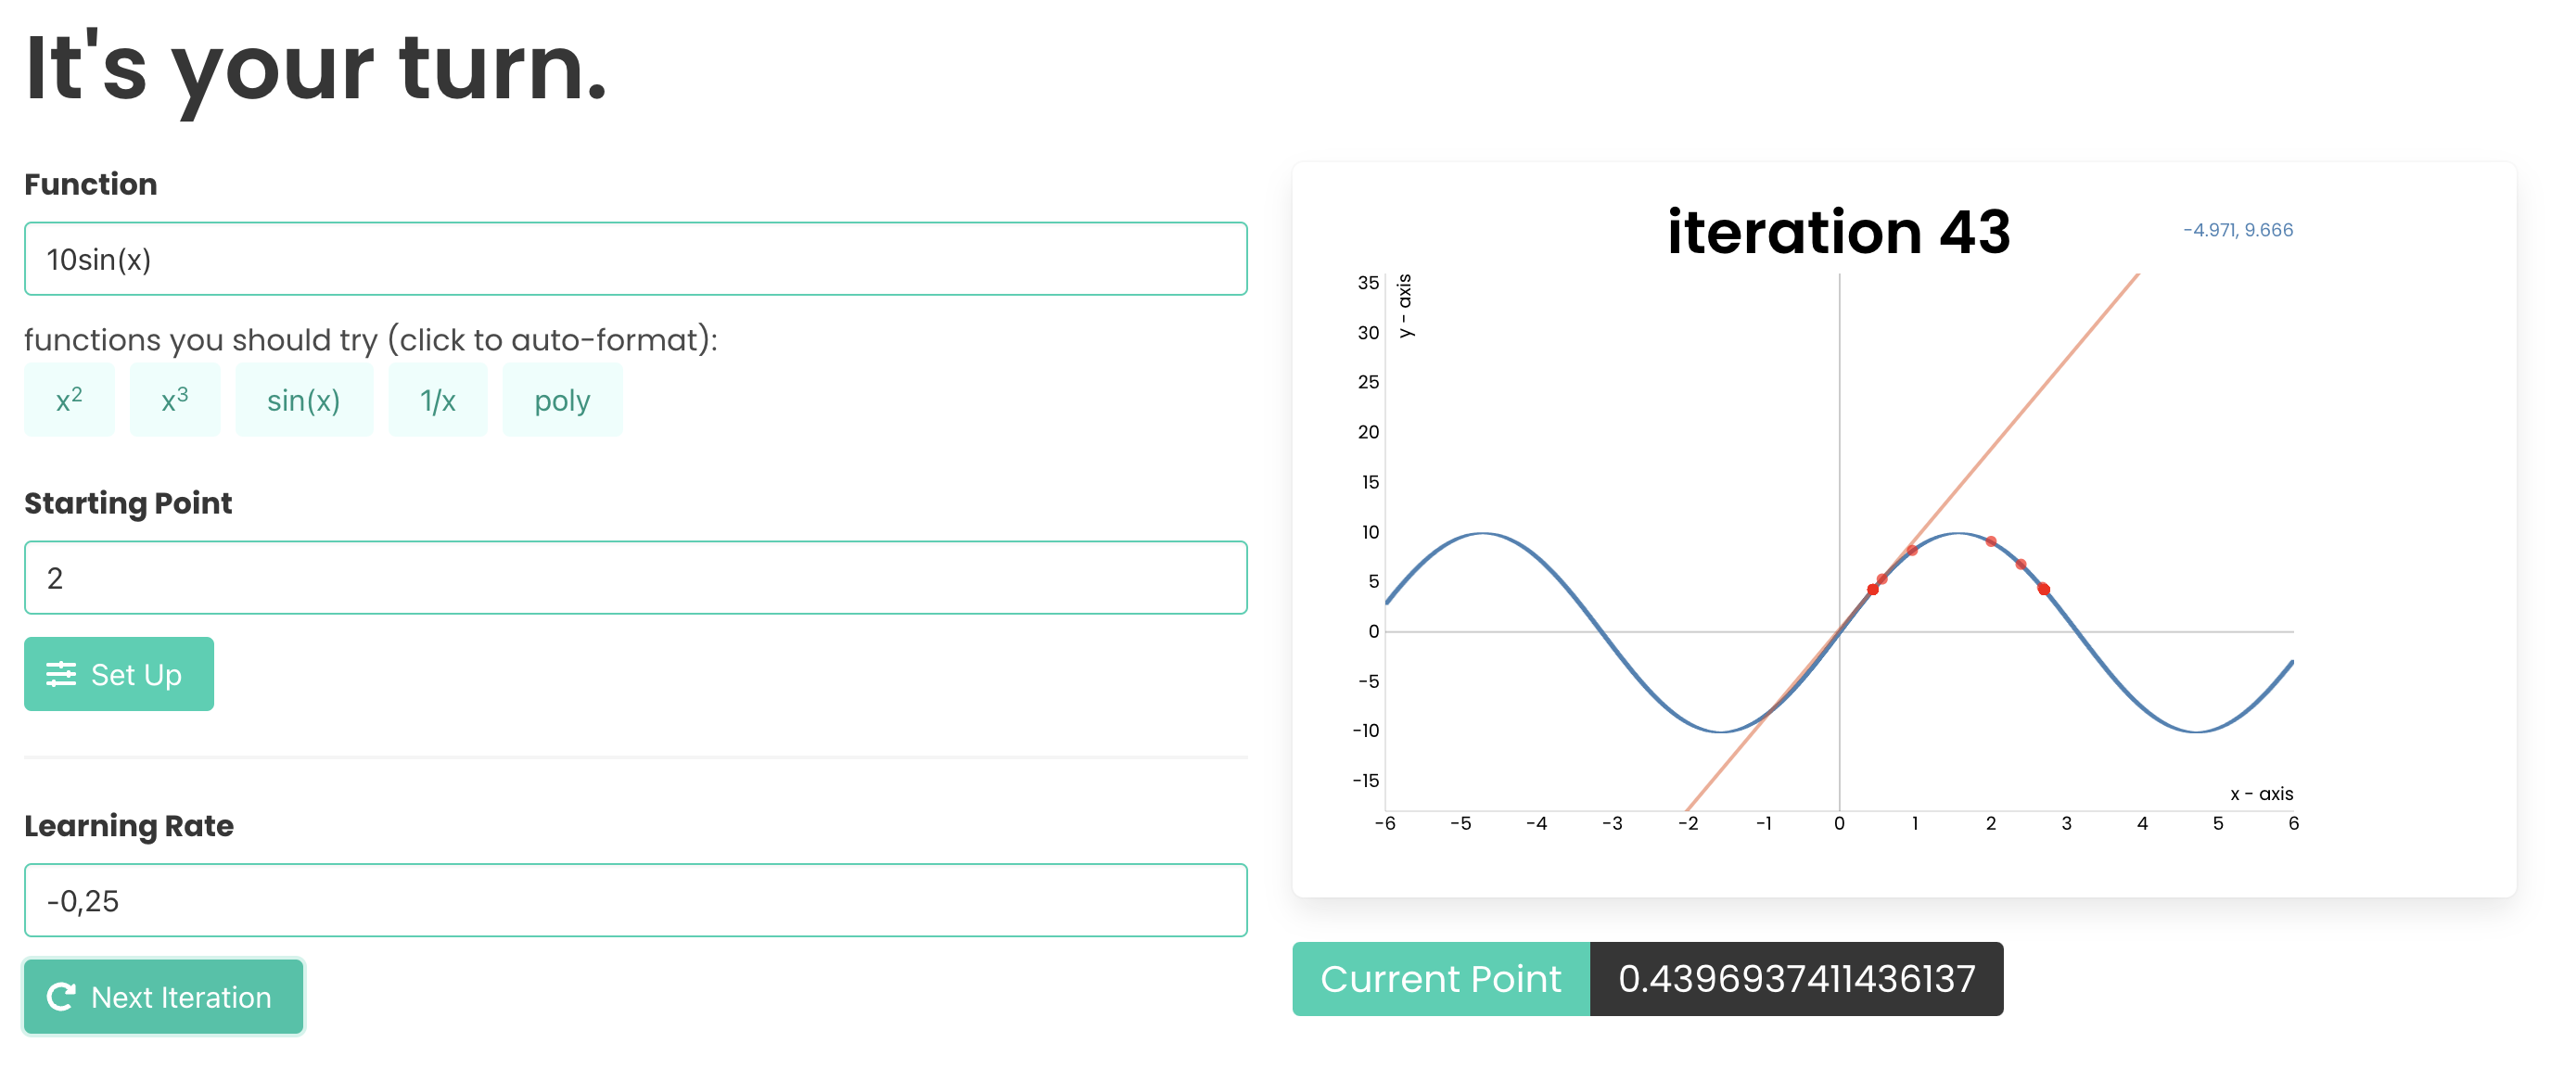

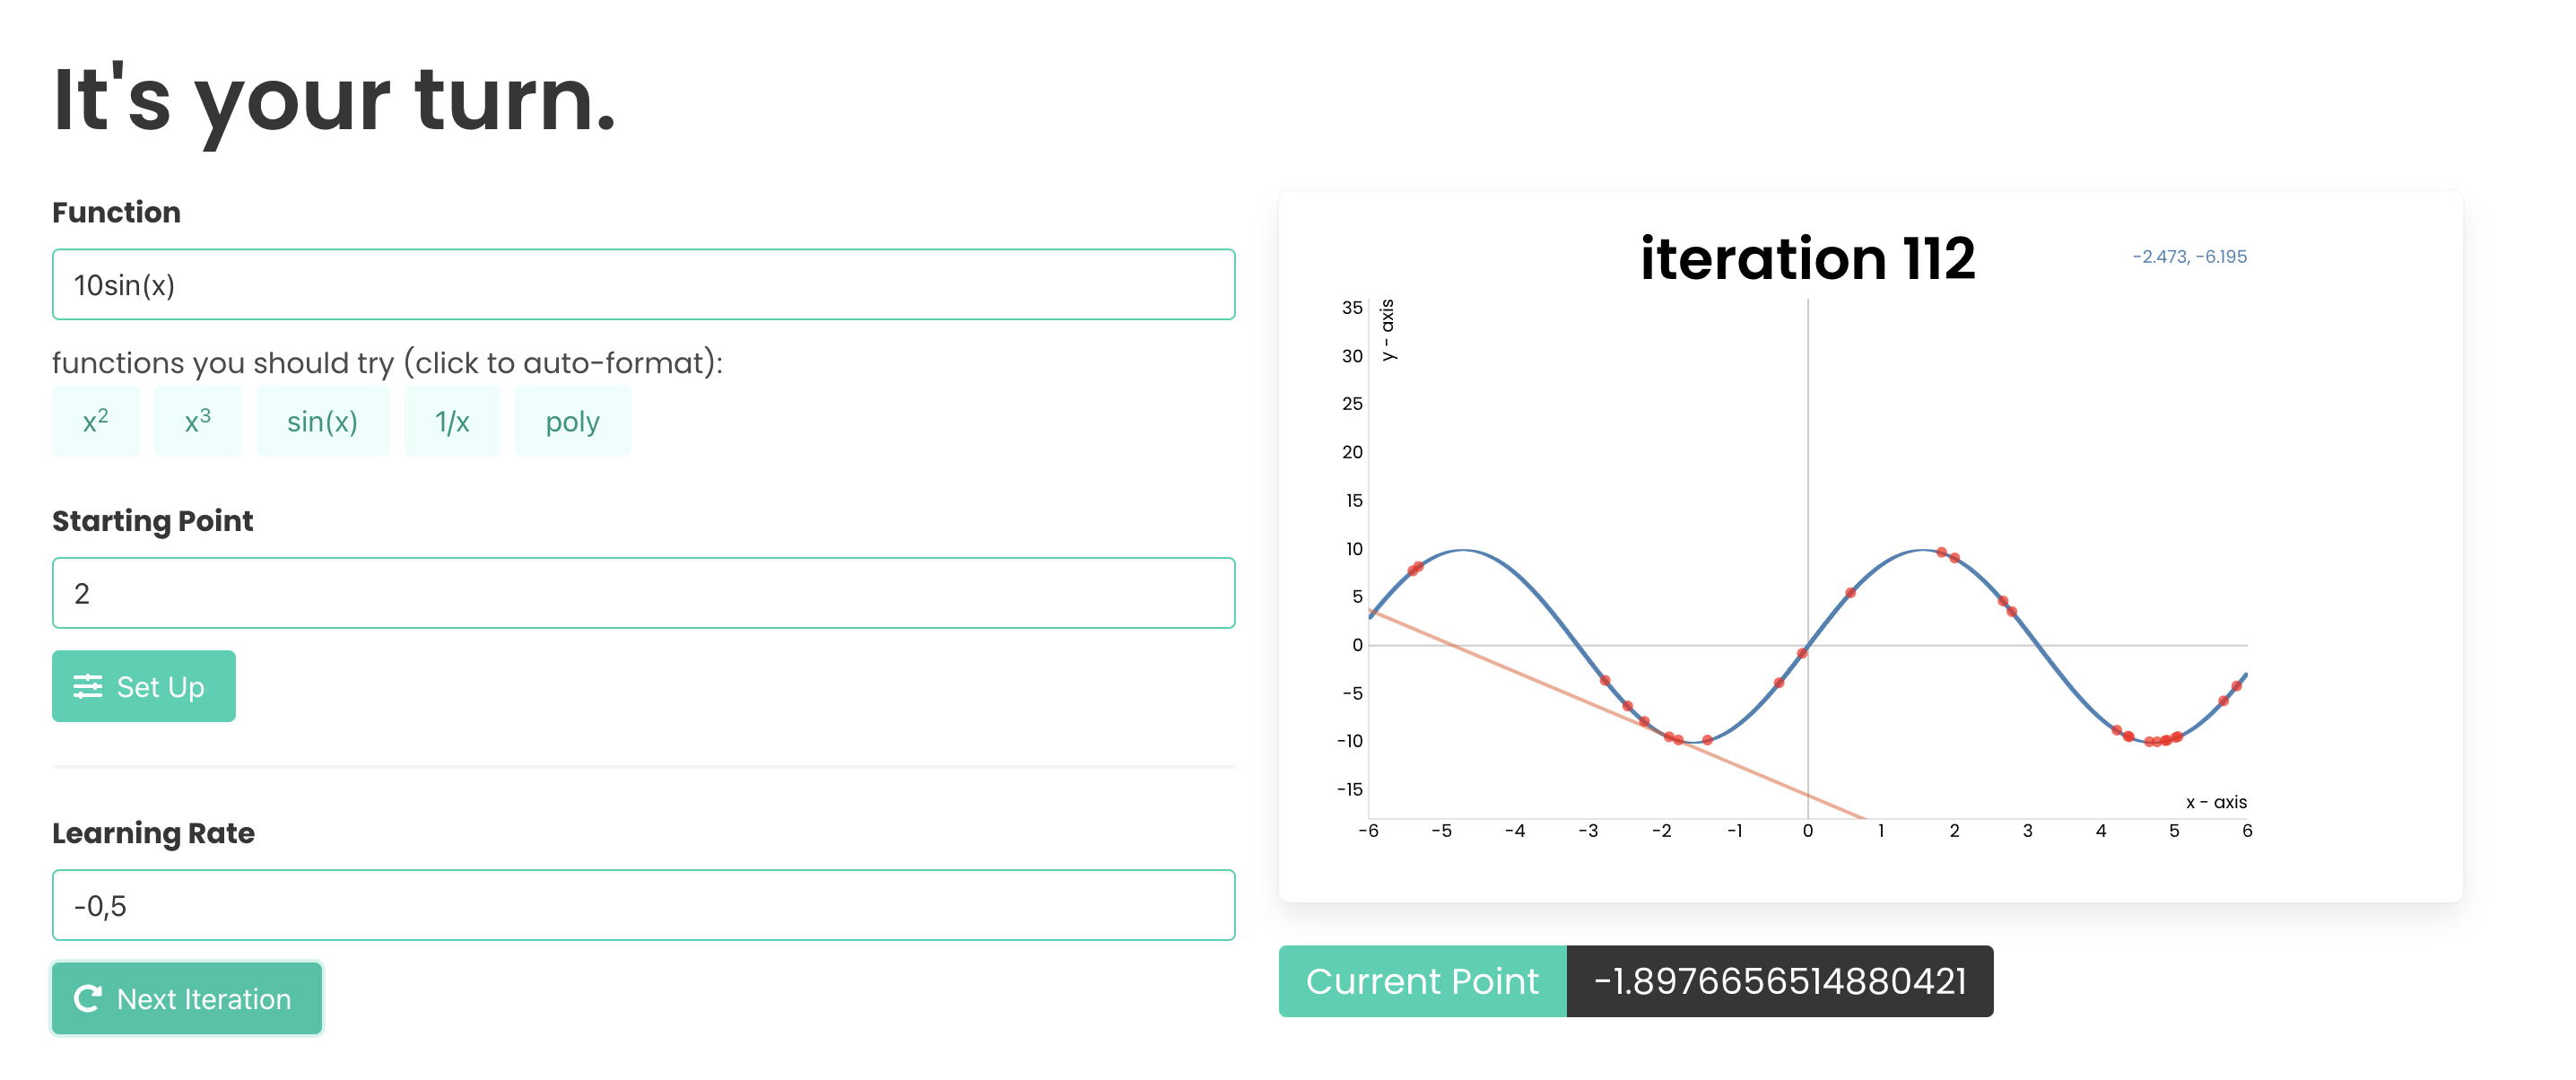

#Regressió logística

Al codi següent, extret de https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py afegiu-hi les línies que necessiteu i responeu les qüestions següents, referides a la regressió logística.

a) Quin és el valor del pes **w**?

b) Quin és el valor del biaix **b**?

c) Quin punt de tall en x marca la frontera entre la classe positiva i la negativa?

d) Quin paràmetre de regularització s'utilitza?

Valor de 'w':  6.866805804226174
Valor de 'b':  -1.638899398538546
Punto de corte del eje X 0.23866983358257865
El parámetro de regularización utilizado es C = 100000.0



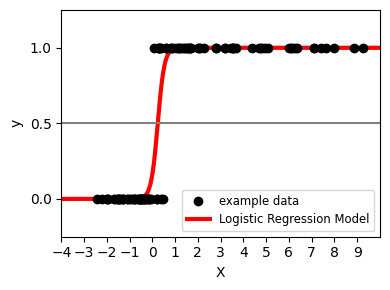

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LogisticRegression

# Generate the dataset
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)


        ##### RESPUESTAS A LOS APARTADOS #####
w = clf.coef_[0,0]
b = clf.intercept_[0]
print("Valor de 'w': ", w)
print("Valor de 'b': ", b)

# El punto de corte en la regresión logísitca ocurre cuando: w * x + b = 0
# Por lo tanto despejamos la X y obtendremos el punto ce corte: x = - (b / w)
print("Punto de corte del eje X", (-b / w))

print("El parámetro de regularización utilizado es C =", 1e5)
print()
###


loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()


#Màquines de suport vectorial

Aplicau els quatre classificadors basats en SVM de la pàgina https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html al problema de la XOR. El codi que necessitam ja està copiat aquí al quadern, no l'heu de dur de la web.

a) Generau $400$ punts amb coordenades $x[:,0]$ i $x[:,1]$ aleatòries uniformement repartides entre $-1$ i $1$.
https://numpy.org/doc/1.15/reference/generated/numpy.random.rand.html

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.random.rand(400, 2)
X = (2 * X) - 1

b) Per a cada punt, assignau l'etiqueta de classe $y$ igual a $1$ si les dues coordenades són del mateix signe i $0$ si són de signe oposat.

In [50]:
y = np.where(X[:, 0] * X[:, 1] > 0, 1, 0)

c) Visualitzau les dades que heu generat. Heu d'obtenir un gràfic semblant al de l'apartat dels apunts de SVM amb kernel.

Per aconseguir-ho, executau la cel·la següent, que modelitzarà les dades que heu generat.

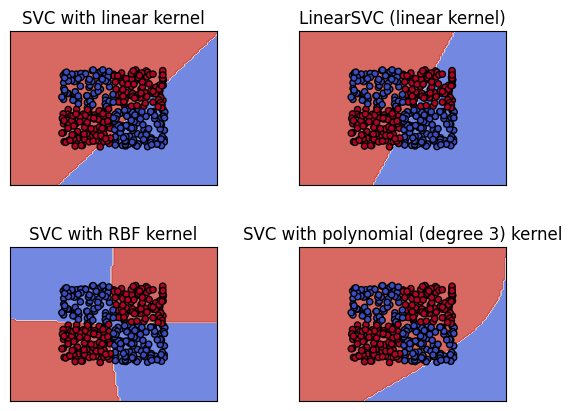

In [51]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Observau que el model que millor s'ajusta a les dades és el que utilitza kernel RBF.

d) Finalment, explorem la influència del paràmetre $\gamma$ en la simetria del model. Per això, en lloc de mostrar quatre models diferents, ara mostrareu nou variants d'un mateix model, el de kernel RBF amb nou valors diferents de $\gamma$, de $0.1$ a $0.9$. Copiau el codi de la cel·la anterior en la següent i modificau-lo de forma que es puguin veure simultàniament els nou gràfics. Haureu de canviar els paràmetres de `subplot`, els `title`...

Quin valor de $\gamma$ és el que dona un resultat més simètric?

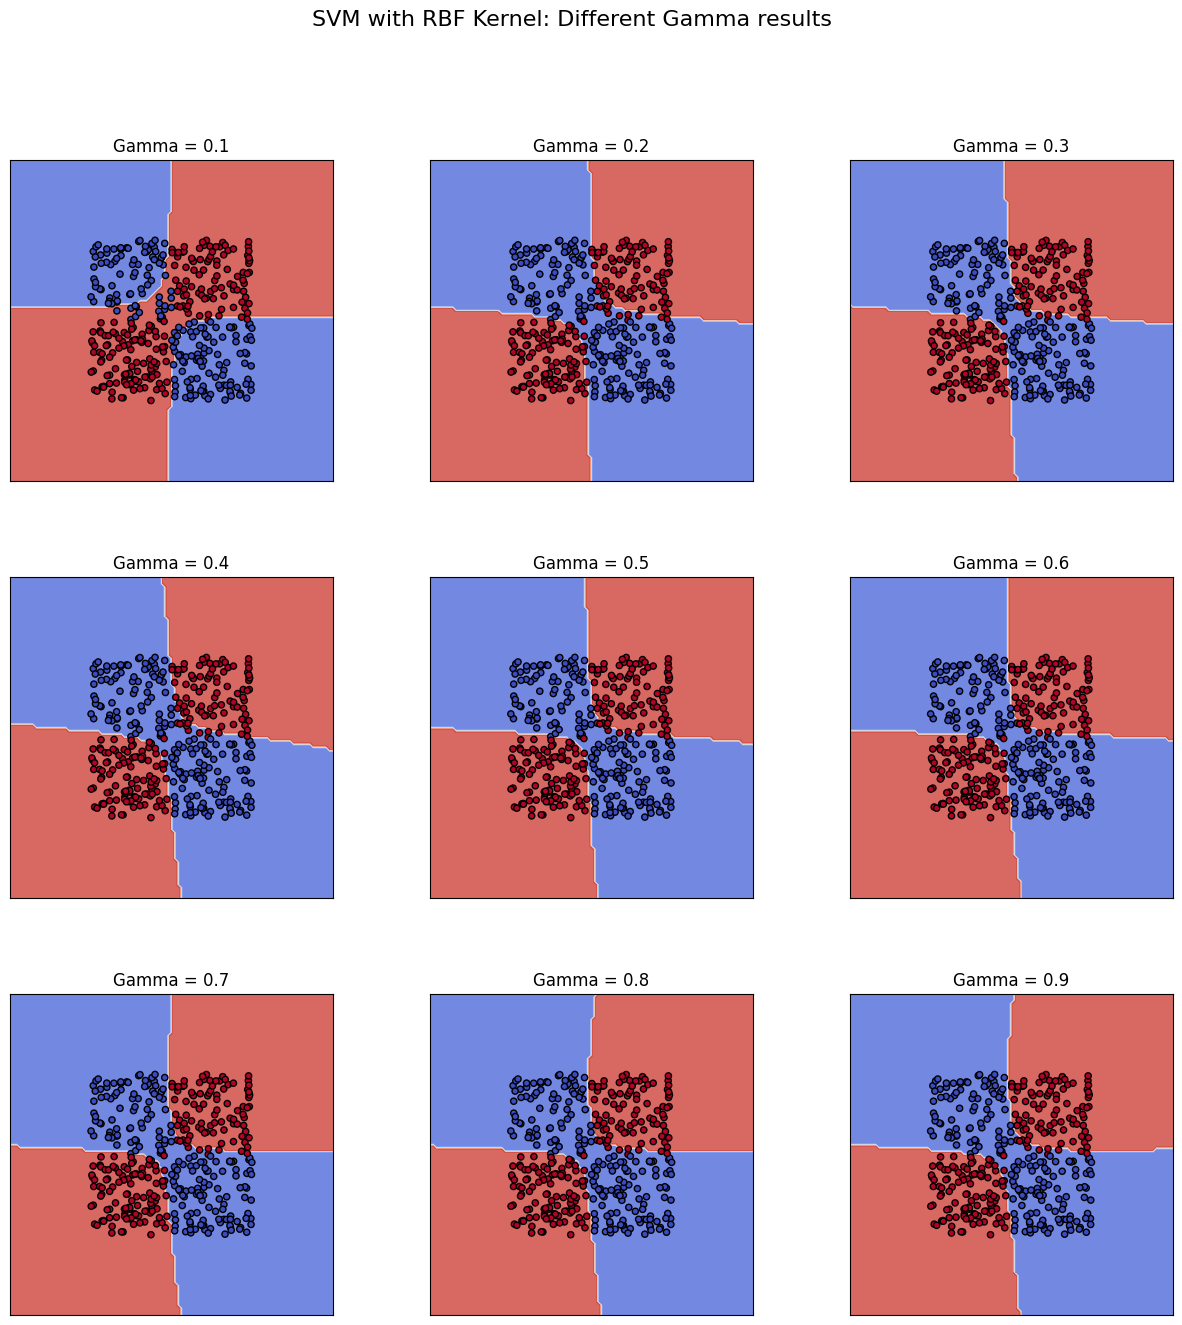

In [52]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

gamma_values = np.linspace(0.1, 0.9, 9)

C = 1.0  # SVM regularization parameter
models = [svm.SVC(kernel="rbf", gamma=gamma, C=C).fit(X, y) for gamma in gamma_values]

# title for the plots
titles = [f"Gamma = {gamma:.1f}" for gamma in gamma_values]

# Set-up 3x3 grid for plotting.
fig, sub = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('SVM with RBF Kernel: Different Gamma results', fontsize=16)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## **Conclusión**

El valor de gamma que da los resultados más simétricos parece ser alrededor de  ***gamma = 0.5*** . A partir de este valor, los resultados empiezan a ser más difíciles de diferenciar visualmente. Sin embargo, también quiero destacar el valor de ***gamma = 0.8***, ya que a simple vista parece tener un “cuello de botella” más amplio en la zona azul, y eso creo que puede ser más cercano a un resultado óptimo.

#Arbres de decisió

Modificau l'exemple d'arbre de decisió que trobareu a https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html de forma que utilitzi les mateixes característiques que als apunts: la longitud i l'amplada del pètal. Hi ha un requadre al [quadern de classificació](https://colab.research.google.com/drive/1IC31YREPePBlheVHL3zLL1vW4Sb5NFQk?usp=sharing) sota el títol **Preparació de les dades** on se seleccionen aquestes característiques.

Distribuïu el codi en els cinc apartats següents.

###Importacions i càrrega de les dades

In [82]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
iris = datasets.load_iris()

X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


###Generació de la graella de punts

In [83]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

x_grid, y_grid = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1))

grid = np.c_[x_grid.ravel(), y_grid.ravel()]

###Ajust del model i predicció

In [84]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)

tree.fit(X, y)

y_pred = tree.predict(grid)
y_pred = np.reshape(y_pred, x_grid.shape)

### Visualització de les zones de decisió i de les dades d'entrenament

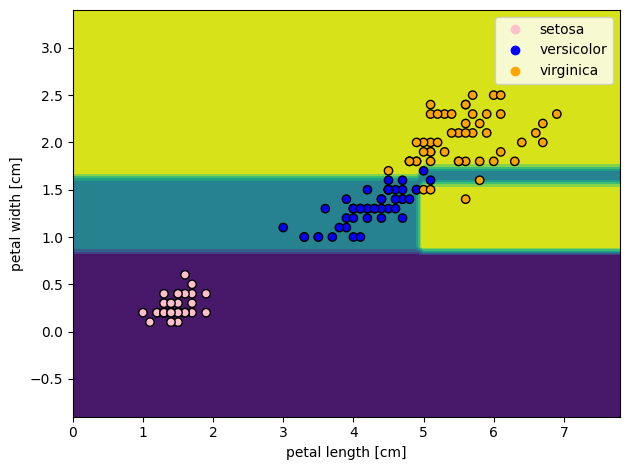

In [115]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

display = DecisionBoundaryDisplay(
    xx0=x_grid, xx1=y_grid, response=y_pred
)
display.plot()

cmap = ListedColormap(['pink', 'blue', 'orange'])
scatter = display.ax_.scatter(
    X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k"
)

handles, labels = scatter.legend_elements()
display.ax_.legend(handles, iris.target_names, loc='best')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')

plt.tight_layout()
plt.show()

Quan executeu el codi podreu observar la forma característica de les fronteres en els arbres de decisió, formada per segments paral·lels als eixos.

#Classificació k-nearest neighbours


En aquesta darrera pregunta explorarem l'efecte del nombre de veïns $k$ en l'algorisme KNN i ho relacionarem amb l'infraajust o sobreajust del model.

El codi està tot desenvolupat, la vostra feina aquí és interpretar els resultats i modificar qualque paràmetre numèric.

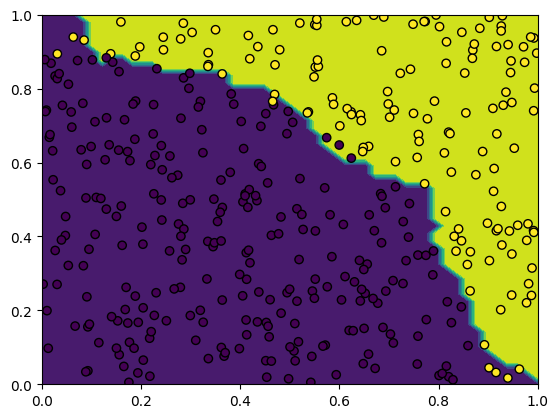

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X=np.random.rand(400,2)

y=((X[:,0]**2+X[:,1]**2)>.8).astype(int)

feature_1, feature_2 = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
knn = KNeighborsClassifier(n_neighbors=11).fit(X, y)
y_pred = np.reshape(knn.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
     xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")

plt.show()



a) Per què convé que el nombre de veïns sigui senar?

b) Explicau per què no tots els punts de dades estan classificats correctament.

c) Quin valor de $k$ garantiria que tots els punts de dades estarien classificats correctament? Podeu comprovar-ho experimentant al codi.

d) Quin problema presentaria en aquest cas el model, infraajust o sobreajust?

## **a)**

La razón principal para usar un número impar de vecinos en KNN es evitar empates en el proceso de clasificación. Cuando el número de vecinos (K) es par, podría darse el caso en que las clases tengan el mismo número de votos, lo que dificulta determinar a qué clase pertenece el nuevo punto.

Usando un número impar de vecinos, nos aseguramos que siempre haya una clase con más votos, resolviendo el problema del empate.

## **b)**

Hay varios motivos por los que KNN puede estar clasificando incorrectamente algunos datos.  
- **Número de vecinos:** Puede que el número de vecinos K=11 esté siendo una de las razones. Al ser un número alto puede que esté generalizando demasiado los puntos a clasificar. Si hay más vecinos de una clase opuesta cerca del punto a clasificar, KNN puede decantarse incorrectamente incluso si debería pertenecer a otra clase.  

- **Límite de decisión:** KNN no tiene conocimiento de la forma del límite de decisión ya que solo conoce los puntos a clasificar y sus vecinos. Por lo que si en una zona curva hay una mezcla de vecinos, será muy probabel que cometa un error.

- **Escasez de datos:** La situación inversa de lo que se ha comentado en el punto anterior es otra razón de error. En el caso en que haya pocos puntos cerca de la frontera entre clases, la clasificación se puede volver menos precisa ya que no hay suficiente información para poder clasificar los nuevos puntos en su sitio.

## **c)**

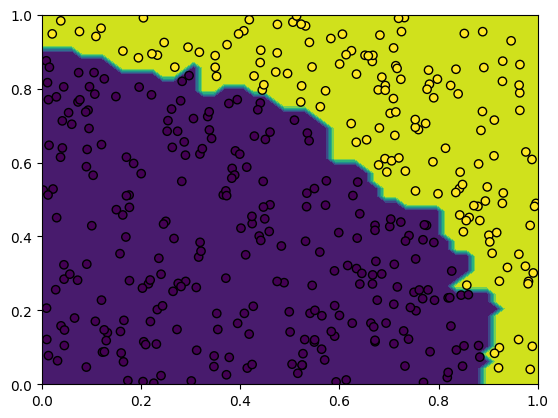

In [125]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X=np.random.rand(400,2)

y=((X[:,0]**2+X[:,1]**2)>.8).astype(int)

feature_1, feature_2 = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)
y_pred = np.reshape(knn.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
     xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")

plt.show()



Después de experimentar con el código vemos que el valor K = 1 nos da una clasificación de datos bastante buena. Sin embargo tengo la sensación de que podría dar un problema de overfitting por la forma de la frontera.

## **d)**

Justo como he comentado en el apartado anterior el problema de K = 1 es el sobreajuste. La razón que usaría es por la manera en la que la frontera se ajusta a los datos tanto en la zona inferior (aproximadamente donde x=0.8) como en la zona superior (aproximadamente donde x=0.3).

A modo de prueba para entender mejor como afecta K a la clasificación he hecho una prueba con K = 100 y en el siguiente código está el resultado. Claramente tenemos el caso contrario de infraajuste, por lo que encontrar un valor balanceado de K es muy importante para conseguir un clasificador que genere los menores errores posbiles.

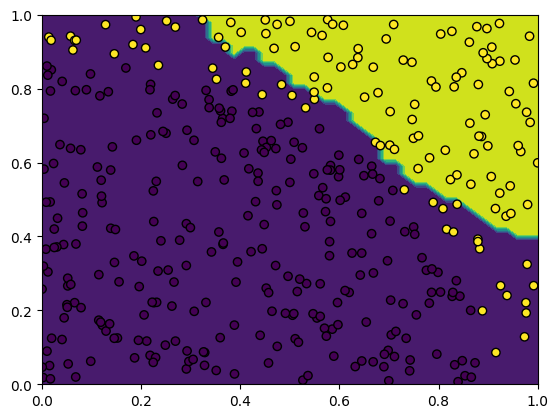

In [126]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X=np.random.rand(400,2)

y=((X[:,0]**2+X[:,1]**2)>.8).astype(int)

feature_1, feature_2 = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
knn = KNeighborsClassifier(n_neighbors=100).fit(X, y)
y_pred = np.reshape(knn.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
     xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")

plt.show()

